In [1]:
import os
import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt
import json
print(os.getcwd())

/home/csanyid/BraTS


In [2]:
#shutil.rmtree(preprocessed_val_dir)

In [3]:
mri_types = ['t1', 't1ce', 't2', 'flair', 'seg']

In [4]:
base_dir = '/home/csanyid/BraTS'
data_dir = os.path.join(base_dir, 'data/train')
preprocessed_train_dir = os.path.join(base_dir, 'data/preprocessed_train')
preprocessed_val_dir = os.path.join(base_dir, 'data/preprocessed_val')
os.makedirs(preprocessed_train_dir, exist_ok=True)
os.makedirs(preprocessed_val_dir, exist_ok=True)
print(os.path.isdir(data_dir))

True


flair, 
seg, 
t1, 
t1ce, 
t2

In [5]:
properties = {}

In [20]:
#collect properties
for folder in [i for i in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, i))]:
    case_id = folder[-3:]
    seg_name = os.path.join(data_dir, folder, folder + '_seg.nii')
    images = {}
    for t in mri_types:
        image_name = os.path.join(data_dir, folder, folder + '_' + t + '.nii')
        image = sitk.GetArrayFromImage(sitk.ReadImage(image_name))
        images[t] = image
    voxel_cnt = np.prod(images['seg'].shape)
    label0_cnt = np.count_nonzero(images['seg']==0)
    label1_cnt = np.count_nonzero(images['seg']==1)
    label2_cnt = np.count_nonzero(images['seg']==2)
    label4_cnt = np.count_nonzero(images['seg']==4)
    label_other_cnt = voxel_cnt - label0_cnt - label1_cnt - label2_cnt - label4_cnt
    shape = []
    for i in images['seg'].shape:
        shape.append(int(i))
    all_shape_standard = True
    for key, i in images.items():
        if i.shape != (155, 240, 240):
            all_shape_standard = False
            print('Not standard shape: ', case_id, ' ', key)
    properties[case_id] = {
        'seg shape' : shape,
        'all_shape_standard' : all_shape_standard,
        'voxel_cnt' : int(voxel_cnt),
        'label0_cnt' : int(label0_cnt),
        'label1_cnt' : int(label1_cnt),
        'label2_cnt' : int(label2_cnt),
        'label4_cnt' : int(label4_cnt),
        'label_other_cnt' : int(label_other_cnt)
    }
    
    for key, i in images.items():
        properties[case_id][key+'_min_max'] = [int(i.min()), int(i.max())]

KeyboardInterrupt: 

In [ ]:
with open('./properties.json', 'w') as f:
    json.dump(properties, f)

In [ ]:
properties['007']

In [6]:
i = 2
folders = [i for i in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, i))]
folder = folders[i]
for t in mri_types:
    image_name = os.path.join(data_dir, folder, folder + '_' + t + '.nii')
    image = sitk.GetArrayFromImage(sitk.ReadImage(image_name))
    images[t] = image
print(images['seg'].shape)
print(images['t1'].shape)
print(images['t1ce'].shape)
print(images['t2'].shape)
print(images['flair'].shape)

NameError: name 'images' is not defined

In [7]:
patient_cnt = 5
fig, ax = plt.subplots(patient_cnt, 5, figsize=(20, 5*patient_cnt))

for patient_num in range(patient_cnt):
    folder = folders[patient_num+10]
    for t in mri_types:
        image_name = os.path.join(data_dir, folder, folder + '_' + t + '.nii')
        image = sitk.GetArrayFromImage(sitk.ReadImage(image_name))
        images[t] = image
    
    #dim0_tumor_indices = np.where(images['seg'].max((1, 2))!=0)[0]
    #dim0_index = dim0_tumor_indices[-1]-dim0_tumor_indices[0]
    #print(dim0_index)
    
    cnt = 0
    for key,i in images.items():
        ax[patient_num][cnt].imshow(i[i.shape[0]//2, :,:], cmap = 'gray')
        ax[patient_num][cnt].set_title(key)
        cnt += 1

NameError: name 'images' is not defined

In [ ]:
for i in range(0, seg.shape[0], 10):
    plt.imshow(seg[i, :, :], cmap='gray')
    plt.show()
    plt.imshow(t1[i, :, :], cmap='gray')
    plt.show()

In [ ]:
    plt.imshow(t1[:, :, 120], cmap='gray')
    plt.show()

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

(5, 160, 256, 256)


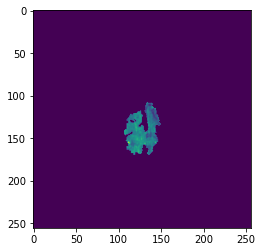

(array([  0,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,
         17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,
         30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
         43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
         56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
         69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,
         82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,
         95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107,
        108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120,
        121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133,
        134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146,
        147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159,
        160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172,
        173, 174, 175, 176, 177, 178, 179, 180, 181

In [7]:
a = np.load(os.path.join(preprocessed_train_dir, '001.npy'))
print(a.shape)
plt.imshow(a[1, 140])
plt.show()
np.unique(a[2], return_counts = True)

In [60]:
minx = 100
maxx = 100
for i in range(270):
    a = np.load(os.path.join(preprocessed_train_dir, '001.npy'))
    for j in range(4):
        x, y, z = np.where(a[0] != 0)
        z = np.unique(z)
        curr_minx = np.min(z)
        if curr_minx < minx:
            minx = curr_minx
        curr_maxx = np.max(z)
        if curr_maxx > maxx:
            maxx = curr_maxx
    if i%20 == 0:
        print(i)
        
print('\n', minx, maxx)

0
20
40
60
80
100
120
140
160
180
200
220
240
260

 49 185


In [62]:
"""
z
y 42, 214
x 49 214
"""

'\nz\ny 42, 214\nx 49 214\n'

In [45]:
16*9

144

In [36]:
x, y, z = np.where(a[3] != 0)
print(np.unique(x))

[  6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21  22  23
  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41
  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59
  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77
  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95
  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113
 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131
 132 133 134 135 136 137 138 139 140]
